# Praca domowa nr 6
Adrianna Grudzień\
25.05.2021 r.

W ramach pracy domowej z przedmiotu Wstęp do uczenia maszynowego 

In [308]:
import pandas as pd

In [309]:
from sklearn.datasets import fetch_olivetti_faces

## 0. Przykładowe obrazy

In [310]:
# wczytanie zbioru
olivetti = fetch_olivetti_faces()

In [311]:
X = olivetti.data
images = olivetti.images
Y = olivetti.target

print(olivetti.DESCR)
print('data:\n', X)
print('\nimages: \n', images)
print('\ntarget: \n', Y)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [312]:
print('data.shape ', X.shape)
print('images.shape ', images.shape)
print('target.shape ', Y.shape)

data.shape  (400, 4096)
images.shape  (400, 64, 64)
target.shape  (400,)


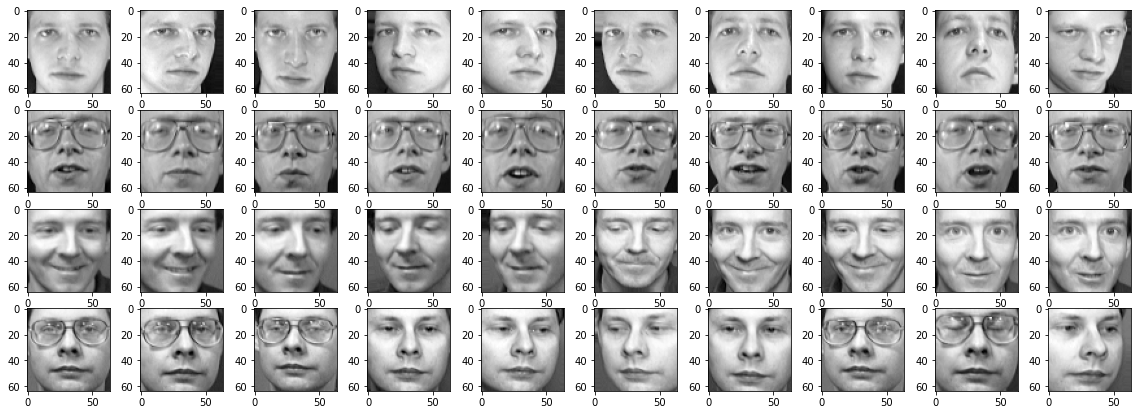

In [313]:
from skimage.io import imshow
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 10, figsize=(20, 7))
for i in range(0, 40):
    axs[i//10, i%10].imshow(images[i])

In [314]:
df = pd.DataFrame(olivetti.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


Treść zadania

0. Narysować wybrane obrazy.
1. Wykorzystać algorytm PCA do kompresji zbioru Olivetti Faces. Dobrać odpowiednią liczbę składowych. Po transformacji obliczyć stopień kompresji. Rozmiar obrazka: liczba wartości numerycznych
2. Przeprowadzić transformację odwrotną (inverse_transform). Narysować, porównać z pkt. 0. Obliczyć błąd rekonstrukcji w postaci błędu RMSE dla każdego obrazu.
3. Przygotować kilka / kilkanaście zmodyfikowanych obrazów (np. obróconych o 90 stopni, przyciemnionych, odbitych w poziomie).
4. Korzystając z modelu wyuczonego w pkt. 1 przeprowadzić transformację, a następnie odwrotną transformację obrazów z pkt. 3. Obliczyć błąd rekonstrukji dla każdego typu modyfikacji. Porównać z wartościami błędu uzyskanymi w pkt. 2.
5. Czy PCA może służyć do wykrywania pewnego typu anomalii w zdjęciach twarzy? Jeżeli tak to jakich?


## 1. Algorytm PCA (kompresja zbioru)

In [315]:
from sklearn.decomposition import PCA
import numpy as np

In [316]:
pca = PCA().fit(X)

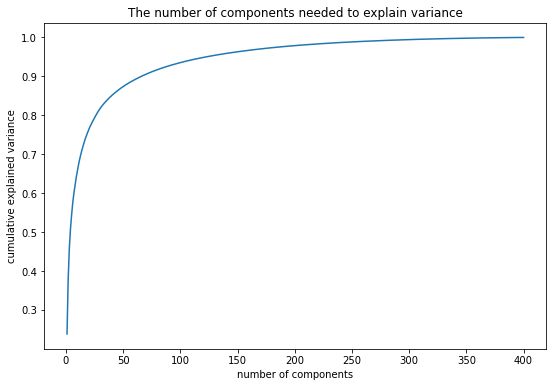

In [317]:
plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('The number of components needed to explain variance')
plt.show()

Według niektórych źródeł optymalną liczbą komponentów jest taka, przy której wyjaśniona wariancja przyjmuje wartości na poziomie 90-95%. Aby znaleźć te wartości, narysuję dodatkowe znaczniki na wykresie. 

https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

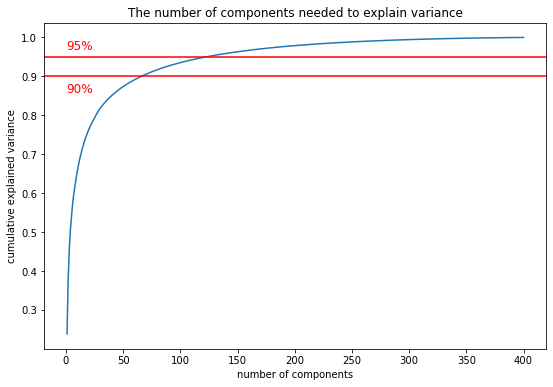

In [318]:
plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.97, '95%', color = 'red', fontsize=12)

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.86, '90%', color = 'red', fontsize=12)

plt.show()

To teraz pozostaje mi wyznaczyć dokładną wartość najmniejszej największej wartości skumulowanej wyjaśnionej wariancji (a dokładniej odpowiadającą jej liczbę komponentów). Jako parametr `n_components` wpisuję wartość 0.90 - dzięki temu tak naprawdę od razu dostaję odpowiedź na to pytanie.

In [319]:
pca_90 = PCA(n_components = 0.9)
pca_90.fit(X)
n_components = len(pca_90.explained_variance_ratio_)
print('Optymalna liczba komponentów to', n_components)

Optymalna liczba komponentów to 66


## Kompresja

Kompresji dokonujemy przy użyciu utworzonego wcześniej pca_90 (liczba komponentów to 66).

In [320]:
X_compressed = pca_90.fit_transform(X)
X_compressed.shape

(400, 66)

### Stopień kompresji

Dla przypomnienia rozmiar wyjściowy (przed kompresją) zdjęć wynosi 4096 piksele. Kompresję wykonamy do 66 pikseli. Zatem ze wzoru z https://pl.wikipedia.org/wiki/Stopie%C5%84_kompresji dostajemy stopień kompresji $\frac{4096}{66}$, co wynosi w przybliżeniu 62, a dokładniej:

In [321]:
print('Stopień kompresji wynosi', X.shape[1]/X_compressed.shape[1])

Stopień kompresji wynosi 62.06060606060606


## 2. Transformacja odwrotna

In [322]:
X_decompressed = pca_90.inverse_transform(X_compressed)
X_decompressed.shape

(400, 4096)

In [323]:
from sklearn.metrics import mean_squared_error

In [324]:
# def pokaz_zdjecia(X):
#     fig, axs = plt.subplots(1, 10, figsize=(20, 2))
#     for i in range(10):
#         axs[i].imshow(np.reshape(X[i*12], (64,64)))

def zestaw_zdjecia(X, X_decompressed):
    fig, axs = plt.subplots(1, 10, figsize=(20, 2.5))
    fig.suptitle('Oryginały')
    for i in range(10):
        axs[i].imshow(np.reshape(X[i*12], (64,64)))
        axs[i].set_title(f'img no. {i*12}')
    fig, axs = plt.subplots(1, 10, figsize=(20, 2.5))
    for i in range(10):
        axs[i].imshow(np.reshape(X_decompressed[i*12], (64,64)))
        axs[i].set_title(f'img no. {i*12}')
    fig.suptitle('Po dekompresji')
#     plt.gray()
    plt.show()

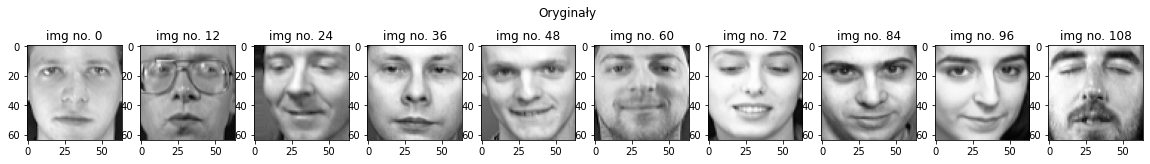

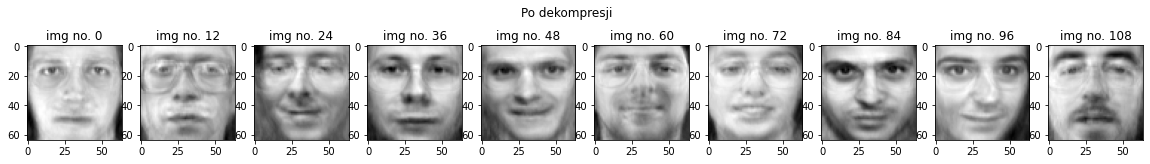

In [325]:
zestaw_zdjecia(X, X_decompressed)

Na części zdjęć zdekompresowanych możemy zaobserwować zarys okularów, mimo że na zdjęciach oryginalnych nie występują. Poza tym na niektórych zdjęciach mina obrazowanych zmieniła się i tak na przykład na ostatnim zdjęciu (nr 108) w oryginale mężczyzna ma zamknięte oczy, a po dekompresji - otwarte (plus okulary). Sprawdźmy jeszcze, czy człowiek z ostatniego zdjęcia pozował w okularach na nosie w którymkolwiek ujęciu.

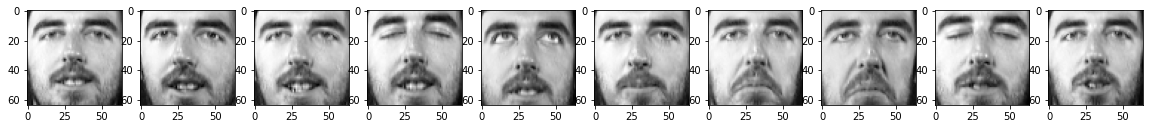

In [326]:
fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(100, 110):
    axs[i-100].imshow(np.reshape(X[i], (64,64)))

Na żadnym ze zdjęć człowiek ten nie miał okularów. Mimo tak rażących różnic, efekt jest dosyć zadowalający.

## Błąd RMSE
Liczę błąd rekonstrukcji w postaci błędu RMSE dla każdego obrazu.

Średni błąd RMSE wynosi: 0.0019220397


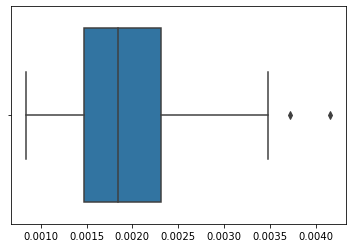

In [327]:
from sklearn.metrics import mean_squared_error
import seaborn as sns

def licz_liste_bledow(X, X_decompressed):
    n = X.shape[0] # liczba zdjęć
    rmse_array = [0] * n
    for i in range(n):
        rmse_array[i] = mean_squared_error(X[i], X_decompressed[i])
    return rmse_array
        
rmse_array = licz_liste_bledow(X, X_decompressed)

print('Średni błąd RMSE wynosi:', np.mean(rmse_array))
sns.boxplot(x = rmse_array)
plt.show()


Liczby potwierdzają intuicję mówiącą, że jakość obrazów nie pogorszyła się dramatycznie - RMSE jest stosunkowo mały.

## Modyfikacje
Dokonuję kilku modyfikacji.

In [328]:
# wybieram pseudolosowo 10 zdjęć, które zmodyfikuję
img_to_transform = [X[i] for i in range(0, 400, 40)]
len(img_to_transform)

10

In [329]:
def pokaz_zdjecia(X):
    fig, axs = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        axs[i].imshow(np.reshape(X[i], (64,64)))

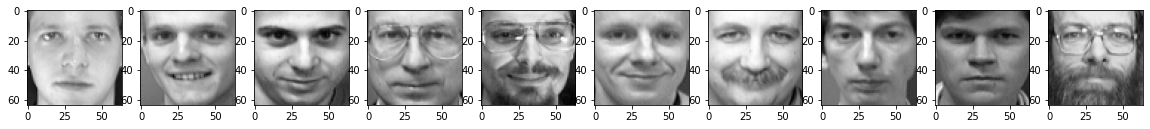

In [330]:
pokaz_zdjecia(img_to_transform)

### Rotacja

In [331]:
def rotate(img):
    return np.transpose(img.reshape((64, 64))).reshape((4096,) )

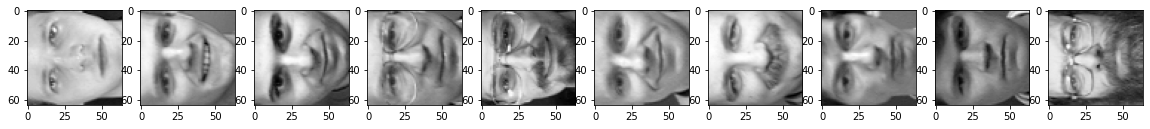

In [332]:
rotated_images = [rotate(img) for img in img_to_transform]
pokaz_zdjecia(rotated_images)

### Przyciemnienie

In [337]:
def dark(img):
    img_reshaped = img
    for i in range(img.shape[0]):
        img_reshaped[i] =  max(1, img_reshaped[i]+0.6)
    return img_reshaped

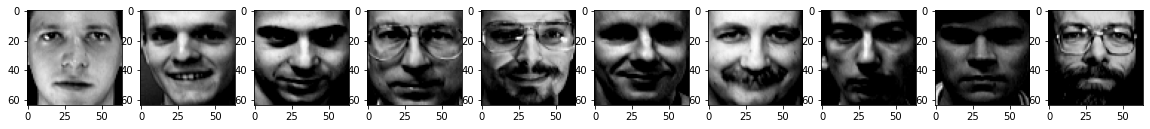

In [336]:
darkened_images = [dark(img) for img in img_to_transform]
pokaz_zdjecia(darkened_images)

## 4. Transpozycja i transpozycja odwrotna zdjęć zmodyfikowanych

In [ ]:
rotated_compressed = pca_90.fit_transform(rotated_images)
rotated_decompressed = pca_90.inverse_transform(rotated_compressed)

rotated_error_array = licz_liste_bledow(np.asarray(rotated_images), np.asarray(rotated_decompressed))

Spójrzmy jak to wygląda.

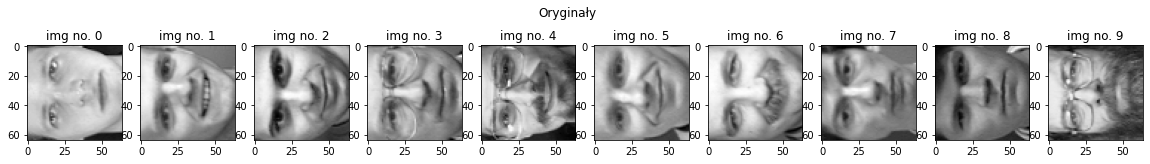

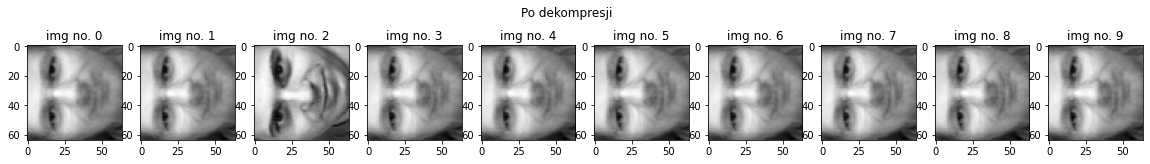

In [354]:
def zestaw_zdjecia(X, X_decompressed):
    fig, axs = plt.subplots(1, 10, figsize=(20, 2.5))
    fig.suptitle('Oryginały')
    for i in range(10):
        axs[i].imshow(np.reshape(X[i], (64,64)))
        axs[i].set_title(f'img no. {i}')
    fig, axs = plt.subplots(1, 10, figsize=(20, 2.5))
    for i in range(10):
        axs[i].imshow(np.reshape(X_decompressed[i], (64,64)))
        axs[i].set_title(f'img no. {i}')
    fig.suptitle('Po dekompresji')
#     plt.gray()
    plt.show()
    
zestaw_zdjecia(rotated_images, rotated_decompressed)

Wynik jest bardzo zły.

In [338]:
darkened_compressed = pca_90.fit_transform(darkened_images)
darkened_decompressed = pca_90.inverse_transform(darkened_compressed)

darkened_error_array = licz_liste_bledow(np.asarray(darkened_images), np.asarray(darkened_decompressed))

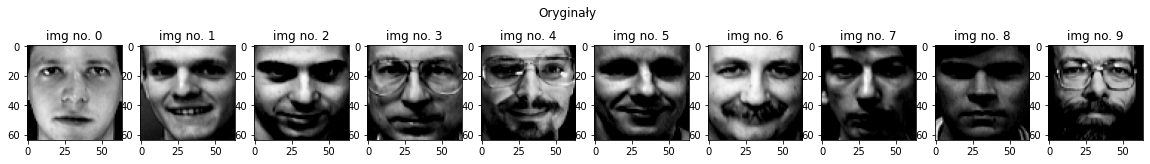

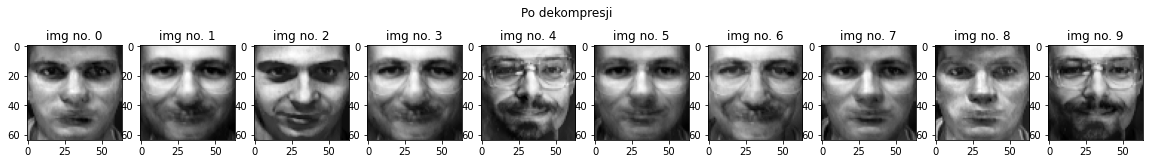

In [355]:
zestaw_zdjecia(darkened_images, darkened_decompressed)

Wynik nie jest tak dramatycznie zły, jak w przypadku rotacji.

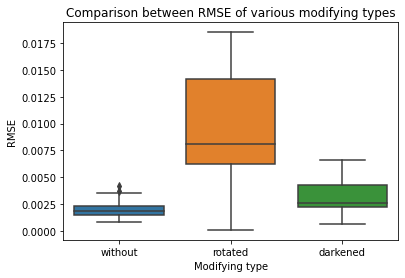

In [352]:
sns.boxplot(data = [rmse_array, rotated_error_array, darkened_error_array])
plt.xticks([0,1, 2], ['without', 'rotated', 'darkened'])
plt.xlabel('Modifying type')
plt.ylabel('RMSE')
plt.title('Comparison between RMSE of various modifying types')
plt.show()

Jak widać, największy błąd RMSE występuje przy zdjęciach obracanych.

## 5. Czy PCA może służyć do wykrywania pewnego typu anomalii w zdjęciach twarzy?
Ponieważ różnice w błędach RMSE są tak znaczące, z łatwością można rozpoznać zdjęcia obrócone i przyciemnione (i analogicznie rozjaśnione).